# Problem 1
Importing data and preparing for regression

In [1]:
import os
import numpy as np, pandas as pd, matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
file_dir = os.path.dirname(os.getcwd())
labels = ('popularity', 'BPM', 'energy', 'danceability',
          'loudness', 'liveness', 'valence', 'length',
          'acousticness', 'speechiness')
data = pd.read_csv(file_dir + '/spotify_data.csv', names = labels)
features = data.values[:, 1:]
target = data.values[:,0]
n, m = features.shape[0], features.shape[1] + 1
X = np.empty((n, m))
X[:, 0] = np.ones(n)
X[:, 1:] = features

Class and function for regression and metrics

In [2]:
class OLS: 

    def __init__(self):
        pass

    def fit(self, X, y):
        self.X, self.y = X, y
        self.weights = np.linalg.inv((X.T.dot(X))).dot(X.T).dot(y)
        
    def predict(self, X_pred):
        w = self.weights
        return (X_pred.dot(w))

def RMSE(y, y_pred):
    return(np.sqrt(np.mean((y-y_pred)**2)))

def r2(y, y_pred):
    ss_res = np.sum((y-y_pred)**2)
    ss_tot = np.sum((y - np.mean(y))**2)
    return (1 - ss_res/ss_tot)


Direct fit without CV

In [3]:
reg = OLS()
reg.fit(X, target)
pred = reg.predict(X)

In [4]:
r2(target, pred), RMSE(target, pred)

(0.19788283230970738, 3.9821924118803054)

With LOOCV

In [5]:
ind = np.arange(n)
pred_loo = np.empty(n)
for i in range(n):
    loo_ind = np.delete(ind, i)
    reg.fit(X[loo_ind], target[loo_ind])
    pred_loo[i] = reg.predict(X[i])



In [6]:
r2(target, pred_loo), RMSE(target, pred_loo)


(-0.2585359870062167, 4.988111512698258)

Plotting

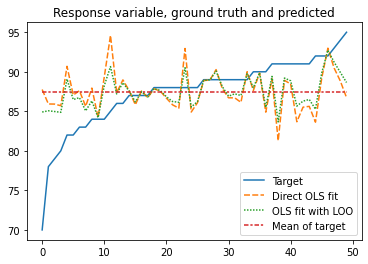

In [7]:
ord_ind = np.argsort(target)
sns.lineplot(data = (target[ord_ind], pred_loo[ord_ind],
                     pred[ord_ind], np.mean(target)*np.ones(n))).set_title('Response variable, ground truth and predicted')
plt.legend(labels=['Target', 'Direct OLS fit', 'OLS fit with LOO', 'Mean of target'])

Text(0.5, 1.0, 'Residuals')

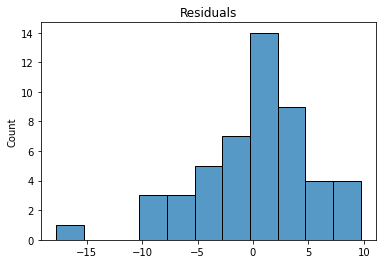

In [8]:
sns.histplot(target-pred_loo).set_title('Residuals')

Removing all entries with popularity > 80, and performing the same fit with LOOCV

In [9]:
target_80 = target[np.where(target > 80)]
n_80 = target_80.shape[0]
X_80 = X[np.where(target > 80)]


In [13]:
pred_loo_80 = np.empty(n_80)
ind = np.arange(n_80)
reg = OLS()
for i in range(n_80):
    loo_ind = np.delete(ind, i)
    reg.fit(X_80[loo_ind], target_80[loo_ind])
    pred_loo_80[i] = reg.predict(X_80[i])

In [14]:
r2(target_80, pred_loo_80), RMSE(target_80, pred_loo_80)

(-0.4418268608312452, 3.6425372756360264)

Text(0.5, 1.0, 'Residuals')

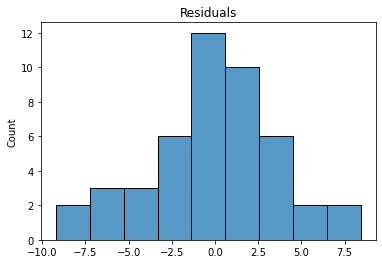

In [15]:
sns.histplot(target_80-pred_loo_80).set_title('Residuals')

# Problem 2

Importing and initializing arrays

In [17]:
digits_train = pd.read_csv(file_dir + '/optdigits-1d-train.csv',
                           sep=' ', names = ['label', 'x'])
digits_test = pd.read_csv(file_dir + '/optdigits-1d-test.csv').to_numpy()

In [18]:
x0 = np.array(digits_train[digits_train['label']==0]['x'])
x1 = np.array(digits_train[digits_train['label']==1]['x'])
n0, n1 = x0.shape[0], x1.shape[0]

Initializing pdf functions

In [19]:
from scipy.special import gamma 
gamma_dist =  lambda x, alpha, beta: x**(alpha-1)*np.exp(-x/beta)/(beta**alpha*gamma(alpha))
normal_dist = lambda x, mu, sigma2: np.exp(-(x - mu)**2/(2*sigma2))/(np.sqrt(2*np.pi*sigma2))

Calculating some attributes

In [20]:
alpha = 9
beta_mle = np.sum(x0)/(n0*alpha)
mu_mle = np.mean(x1)
sigma2_mle = np.sum((x1 - mu_mle)**2)/n1

prior_0 = n0/(n0 + n1)
prior_1 = n1/(n0 + n1) 
beta_mle, mu_mle, sigma2_mle, prior_0, prior_1

(0.018214102564102566,
 0.8261757475083057,
 0.006985238182580767,
 0.5089722675367048,
 0.4910277324632953)

plotting

/Library/Frameworks/Python.framework/Versions/3.9/lib/python3.9/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
/Library/Frameworks/Python.framework/Versions/3.9/lib/python3.9/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


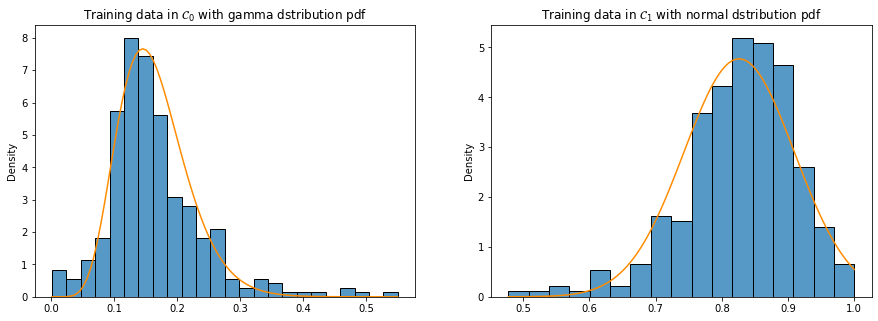

In [21]:
fig, axes = plt.subplots(1, 2, figsize=(15, 5))

sns.histplot(x0, stat='density', ax=axes[0])
x_plot_0 = np.linspace(np.min(x0), np.max(x0), 100)
sns.lineplot(x_plot_0, gamma_dist(x_plot_0, alpha, beta_mle), color='darkorange', ax=axes[0])
axes[0].set_title(r'Training data in $\mathcal{C}_0$ with gamma dstribution pdf')

sns.histplot(x1, stat='density', ax=axes[1])
x_plot_1 = np.linspace(np.min(x1), np.max(x1), 100)
sns.lineplot(x_plot_1, normal_dist(x_plot_1, mu_mle, sigma2_mle), color='darkorange', ax=axes[1])
axes[1].set_title(r'Training data in $\mathcal{C}_1$ with normal dstribution pdf')

plt.savefig('pdfs.pdf')


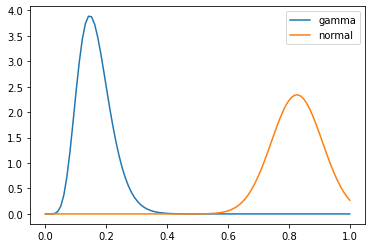

In [22]:
x_plot = np.linspace(0, 1, 100)
plt.plot(x_plot, gamma_dist(x_plot, alpha, beta_mle)*prior_0, label='gamma')
plt.plot(x_plot, normal_dist(x_plot, mu_mle, sigma2_mle)*prior_1, label='normal')
plt.legend()
plt.show()

Naive bayes classifier. This should probably be wrapped in a class, but for now I settled for this rather ugly implementation. 

In [23]:
x_dist = np.linspace(1e-2, 1, 1000)
P0 = prior_0*gamma_dist(x_dist, alpha, beta_mle) 
P1 = prior_0*normal_dist(x_dist, mu_mle, sigma2_mle) 
threshold = x_dist[np.argmin(np.abs(P1-P0))]
def clf(x):
    return((x>threshold).astype(int))

Class for the confusion matrix

In [24]:
class confusion_matrix:

    def __init__(self, y_pred, y_true):
        CM = np.empty((2, 2))
        CM[0, 0] = np.where((y_true + y_pred == 2))[0].shape[0]    #TP
        CM[0, 1] = np.where((y_pred - y_true == 1))[0].shape[0]    #FP
        CM[1, 0] = np.where((y_pred - y_true == -1))[0].shape[0]   #FN
        CM[1, 1] = np.where((y_true + y_pred == 0))[0].shape[0]    #TN
        self.CM = CM
        self.accuracy = (CM[0, 0] + CM[1, 1])/np.sum(CM)
        self.precision = CM[0, 0]/(CM[0, 0] + CM[0, 1])
        self.recall = CM[0, 0]/(CM[0, 0] + CM[1, 0])

Using the classifier on the training set

In [25]:
x_train = digits_train['x'].to_numpy()
y_train = digits_train['label'].to_numpy()

y_pred = clf(x_train)

CM = confusion_matrix(y_pred, y_train)

print(CM.CM)
CM.accuracy, CM.precision, CM.recall                       


[[300.   2.]
 [  1. 310.]]


(0.9951060358890701, 0.9933774834437086, 0.9966777408637874)

In [26]:
test_pred = clf(digits_test).reshape(151)
from assignment1_util import get_msg_for_labels
get_msg_for_labels(test_pred)

'nevergonnagiveymuup'